In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)


In [2]:
df = pd.read_csv('feature_importance/merged_feature_importance.csv', index_col=0)
df = df.dropna(axis=1, how='any')
df

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4RandomForestSingleOutputRegressor,106,24,shap,0.000287,0.002015,0.018361,0.000991,0.004577,0.001189,...,0.000757,0.001988,0.000562,0.000851,0.000615,0.000556,0.000531,0.000268,0.001002,0.004303
1,M4RandomForestRegressor,256,18,shap,0.000317,0.001942,0.012493,0.011043,0.004097,0.000878,...,0.001728,0.001991,0.000624,0.000698,0.000620,0.001001,0.000437,0.000242,0.001335,0.003058
2,M4DummyMeanRegression,243,5,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M4XGBRegressor,Theta,12,shap,0.000323,0.004803,0.021700,0.005030,0.010489,0.003052,...,0.001464,0.002437,0.000644,0.001199,0.000615,0.000623,0.001130,0.000292,0.004180,0.004436
4,M4XGBRegressor,078,15,shap,0.000292,0.003989,0.016970,0.004807,0.007605,0.002599,...,0.001631,0.002586,0.002034,0.000746,0.000962,0.000693,0.000944,0.000313,0.001133,0.004712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29275,M4RandomForestRegressor,sNaive,3,shap,0.000301,0.002060,0.014822,0.004195,0.004892,0.001004,...,0.001740,0.002312,0.000698,0.000619,0.000663,0.001930,0.000674,0.000306,0.000878,0.002781
29276,M4DummyMeanRegression,078,6,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29277,M4XGBRegressor,219,12,shap,0.000586,0.003147,0.021873,0.015610,0.003692,0.006103,...,0.001454,0.004581,0.002105,0.001643,0.001271,0.000663,0.001361,0.000529,0.003244,0.004665
29278,M4DummyMeanRegression,126,5,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
figures_directory = 'figures'

In [4]:
df['ml_algorithm'].unique()

array(['M4RandomForestSingleOutputRegressor', 'M4RandomForestRegressor',
       'M4DummyMeanRegression', 'M4XGBRegressor',
       'M4KerasNetRegressionModel'], dtype=object)

In [5]:
static_columns = ['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm', 'run']
feature_columns = set(df.columns) - set(static_columns)
feature_columns = sorted(list(feature_columns))

In [6]:
dfr = feature_importance_to_feature_rank(df, feature_columns)
dfr

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4RandomForestSingleOutputRegressor,106,24,shap,8.0,52.0,62.0,37.0,57.0,45.0,...,28.0,51.0,22.0,35.0,23.0,21.0,19.0,6.0,39.0,55.0
1,M4RandomForestRegressor,256,18,shap,18.0,51.0,62.0,61.0,55.0,33.0,...,47.0,52.0,22.0,25.0,21.0,38.0,19.0,8.0,45.0,54.0
2,M4DummyMeanRegression,243,5,shap,32.0,32.0,32.0,32.0,32.0,32.0,...,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0
3,M4XGBRegressor,Theta,12,shap,9.0,54.0,63.0,55.0,59.0,50.0,...,38.0,49.0,20.0,32.0,17.0,18.0,29.0,5.0,52.0,53.0
4,M4XGBRegressor,078,15,shap,6.0,51.0,62.0,54.0,57.0,48.0,...,43.0,47.0,45.0,20.0,28.0,17.0,27.0,7.0,33.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29275,M4RandomForestRegressor,sNaive,3,shap,11.0,50.0,62.0,55.0,56.0,36.0,...,48.0,51.0,26.0,21.0,23.0,49.0,25.0,14.0,31.0,54.0
29276,M4DummyMeanRegression,078,6,shap,32.0,32.0,32.0,32.0,32.0,32.0,...,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0
29277,M4XGBRegressor,219,12,shap,15.0,43.0,62.0,61.0,48.0,54.0,...,26.0,51.0,35.0,27.0,22.0,18.0,23.0,11.0,45.0,52.0
29278,M4DummyMeanRegression,126,5,shap,32.0,32.0,32.0,32.0,32.0,32.0,...,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0


In [7]:
gdfr = dfr.groupby(['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm']).mean().reset_index()
gdfr['ml_algorithm_feature_importance_method_pair'] = gdfr['ml_algorithm'] + ',' + gdfr['feature_importance_method']

gdfr = gdfr.query(f'ml_algorithm != "M4DummyMeanRegression"')
gdfr = gdfr.drop(columns=['ml_algorithm', 'feature_importance_method', 'run'])
#gdfr = gdfr.query(f'forecasting_algorithm == "Threta"')
gdfr

,forecasting_algorithm,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,value__first_location_of_maximum,value__first_location_of_minimum,value__percentage_of_reoccurring_values_to_all_values,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1,ml_algorithm_feature_importance_method_pair
1,005,15.100000,47.466667,62.000000,51.133333,63.000000,60.400000,45.700000,56.200000,51.600000,...,39.233333,27.933333,29.900000,22.166667,31.266667,28.300000,31.333333,51.966667,54.533333,"M4KerasNetRegressionModel,permutation"
2,005,12.366667,45.600000,62.033333,55.166667,56.466667,41.600000,49.233333,59.666667,33.766667,...,59.033333,23.600000,24.633333,22.100000,35.033333,19.766667,10.533333,41.666667,52.666667,"M4RandomForestRegressor,permutation"
3,005,14.666667,49.533333,62.033333,50.166667,55.933333,42.633333,46.933333,58.466667,37.466667,...,53.033333,23.733333,25.933333,21.966667,21.633333,36.900000,9.300000,30.100000,54.133333,"M4RandomForestSingleOutputRegressor,permutation"
4,005,10.000000,57.000000,63.000000,59.233333,56.733333,46.200000,50.566667,57.633333,44.833333,...,48.933333,22.233333,34.000000,25.000000,15.433333,27.366667,12.916667,43.100000,51.800000,"M4XGBRegressor,permutation"
6,009,17.066667,42.633333,61.000000,62.000000,63.000000,58.766667,45.466667,53.166667,50.033333,...,35.866667,29.333333,32.466667,21.966667,30.833333,25.900000,31.700000,55.833333,51.966667,"M4KerasNetRegressionModel,permutation"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,Naive2,18.333333,63.000000,62.000000,59.016667,56.300000,55.500000,48.733333,59.083333,27.050000,...,60.250000,28.950000,27.350000,25.116667,21.383333,21.900000,13.916667,27.050000,43.833333,"M4XGBRegressor,xgboost-weight"
972,RNN,18.050000,62.166667,61.783333,50.883333,58.733333,54.533333,56.233333,59.700000,24.250000,...,62.050000,29.900000,30.950000,27.050000,22.866667,20.383333,11.300000,24.216667,37.133333,"M4XGBRegressor,xgboost-weight"
973,SES,18.283333,63.000000,62.000000,59.866667,56.916667,55.783333,49.200000,57.250000,26.383333,...,60.833333,29.033333,27.016667,24.950000,20.716667,21.283333,12.833333,27.800000,43.150000,"M4XGBRegressor,xgboost-weight"
974,Theta,18.216667,63.000000,62.000000,59.416667,56.583333,54.733333,50.466667,58.200000,26.066667,...,61.000000,28.300000,27.600000,26.883333,21.650000,21.433333,12.283333,27.450000,44.633333,"M4XGBRegressor,xgboost-weight"


In [8]:
global_order = []

for v, n in zip(gdfr[feature_columns].mean(axis=0), feature_columns):
    global_order.append((v, n))
    #print(v, n)
    
global_order = sorted(global_order, reverse=True)
global_order = global_order[:15]
global_order = [x[1] for x in global_order]

In [9]:
global_order

['value__median',
 'value__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"max"',
 'value__first_location_of_minimum',
 'value__autocorrelation__lag_2',
 'value__standard_deviation',
 'value__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"var"',
 'value__energy_ratio_by_chunks__num_segments_10__segment_focus_6',
 'value__length',
 'value__permutation_entropy__dimension_3__tau_1',
 'value__spkt_welch_density__coeff_5',
 'value__benford_correlation',
 'value__skewness',
 'value__mean_second_derivative_central',
 'value__first_location_of_maximum',
 'value__autocorrelation__lag_9']

In [10]:
def plotify_df(df):
    df = df.copy(deep=True)
    d = get_feature_name_map()
    df['index'] = df['index'].map(d)
    d = get_meta_importance_name_pair_map()
    return df.rename(columns=d)

def transform_for_plot(l):
    df2 = l.set_index('ml_algorithm_feature_importance_method_pair').T.reset_index()
    #df2 = df2[df2['index'].isin(global_order)]
    df2['Average'] = df2.mean(axis=1)
    df2 = df2.sort_values(by="Average", ascending=False)
    df2 = plotify_df(df2)
    return df2.head(20)

l = gdfr.query(f'forecasting_algorithm == "Theta"').drop(columns=['forecasting_algorithm'])
df2 = transform_for_plot(l)

/tmp/ipykernel_491119/1778287823.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2['Average'] = df2.mean(axis=1)


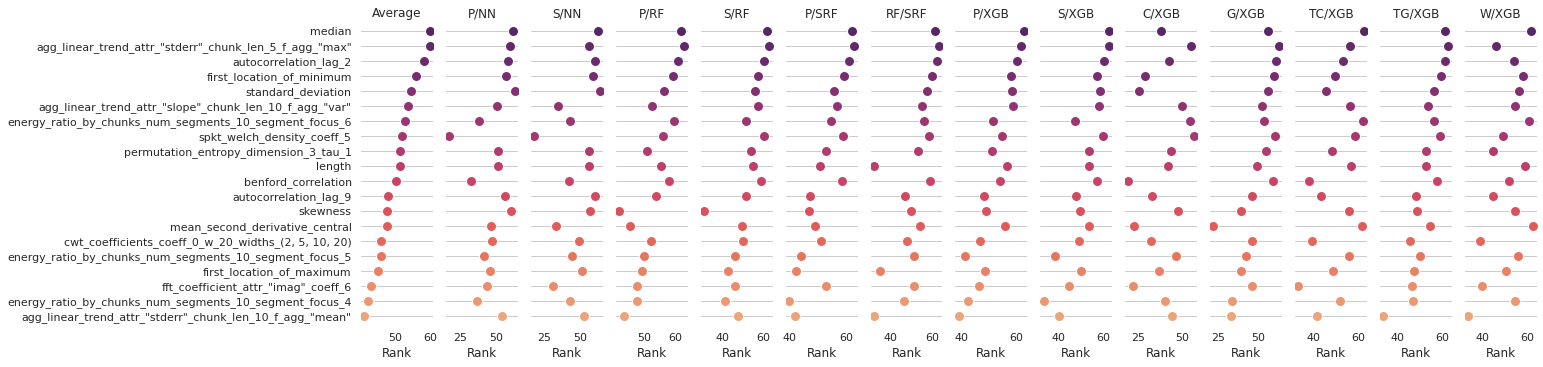

In [11]:
sns.set_theme(style="whitegrid")

titles = ['Average','P/NN', 'S/NN', 'P/RF', 'S/RF', 'P/SRF', 'RF/SRF', 'P/XGB', 'S/XGB', 'C/XGB', 'G/XGB', 'TC/XGB', 'TG/XGB', 'W/XGB']

# Make the PairGrid
g = sns.PairGrid(df2,
                 x_vars=titles, y_vars="index",
                 height=5, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Rank", ylabel="")

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)


plt.savefig(f'{figures_directory}/feature_importance_fixed_forecasting_Theta.pdf', bbox_inches='tight', pad_inches=0)

In [12]:
l = gdfr.query(f'forecasting_algorithm == "ARIMA"').drop(columns=['forecasting_algorithm'])
df2 = transform_for_plot(l)

/tmp/ipykernel_491119/1778287823.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2['Average'] = df2.mean(axis=1)


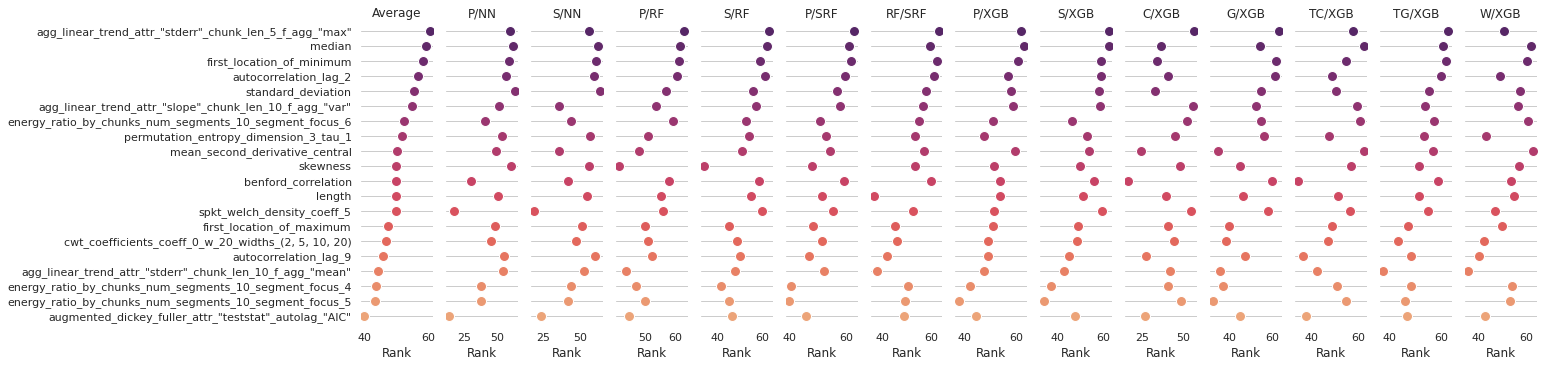

In [13]:
sns.set_theme(style="whitegrid")

titles = ['Average','P/NN', 'S/NN', 'P/RF', 'S/RF', 'P/SRF', 'RF/SRF', 'P/XGB', 'S/XGB', 'C/XGB', 'G/XGB', 'TC/XGB', 'TG/XGB', 'W/XGB']

# Make the PairGrid
g = sns.PairGrid(df2,
                 x_vars=titles, y_vars="index",
                 height=5, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Rank", ylabel="")

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

    #plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)

plt.savefig(f'{figures_directory}/feature_importance_fixed_forecasting_ARIMA.pdf', bbox_inches='tight', pad_inches=0)